<a href="https://colab.research.google.com/github/sbanty/QuarkMatter/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pseudo scalar meson

<ipython-input-41-ae7f24994cad>:6: RuntimeWarning: overflow encountered in exp
  y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) - 1)
<ipython-input-41-ae7f24994cad>:16: RuntimeWarning: overflow encountered in exp
  y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
<ipython-input-41-ae7f24994cad>:21: RuntimeWarning: overflow encountered in exp
  z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))



Partial pressure results (fm^(-4)):
[[0.0014776755872358222, 0.004247786536329961, 0.00969264606505346, 0.019083125500827375, 0.033919407239931455, 0.05593113186994408, 0.08707761507124666], [0.001520225392449321, 0.0043328286088882085, 0.009835375678779712, 0.01929842207263394, 0.03422184681989069, 0.05633504030213912, 0.08759711987243943], [6.889930431838274e-05, 0.00044039632121722883, 0.0016797012988428214, 0.004707415741756766, 0.010791873460731285, 0.021520221693827057, 0.03877075693583965], [6.626611869545992e-05, 0.000427548169124179, 0.0016407538142248234, 0.0046181740263572055, 0.010621032795052606, 0.021231007578028607, 0.03832246689722766], [3.9887851238745724e-05, 0.0002904590839706996, 0.0012069780431816991, 0.0035928770687284175, 0.008611478469227815, 0.01776576100923849, 0.03287118661123262]]


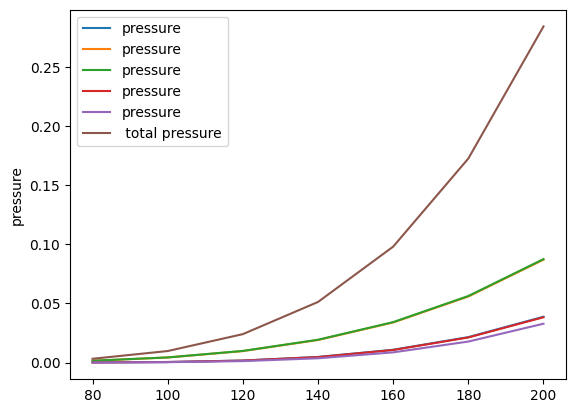

In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) - 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = ((g * tmp) / (2 * np.pi ** 2)) * y
    return  partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))
    y = x ** 2 * (np.log((1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) + z)
    entropy_density = ((g / (2 * np.pi ** 2))) * y
    return entropy_density
mass_values_mev = [139.6,135,493.7,497.6,547.862]  #  mass values for pi+-,Pi0,k+-,K0 k'0, eta particles in MeV/c^2
mu = 0
g = 1

tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  #  temperature values in MeV

results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

#conversion_factor = 1.25e-7  # Conversion factor from MeV^3 to fm^(-3)

for mass in mass_values_mev:
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * (1/(200)**3)
        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu, tmp))[0] * (1/(200)**4)
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu, tmp))[0]  * (1/(200)**4)
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * (1/(200)**3)
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)
    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)


#print("Particle density results (fm^(-3)):")
#print(results_particle_density[0])
print("\nPartial pressure results (fm^(-4)):")
print(results_partial_pressure)
#print("\nEnergy density results (fm^(-4)):")
#print(results_energy_density[0])
#print("\nEntropy density results (fm^(-3)):")
#print(results_entropy_density[0])



totalpressure=[]
for x, y,z,l,m in zip(results_partial_pressure[0], results_partial_pressure[1],results_partial_pressure[2],results_partial_pressure[3],results_partial_pressure[4]):
    totalpressure.append(x + y+l+m+z)





plt.plot(tmp_values_mev,results_partial_pressure[0],label=r'$\pi^+$')
plt.plot(tmp_values_mev,results_partial_pressure[1],label=r'$\pi^-$')
plt.plot(tmp_values_mev,results_partial_pressure[2],label=r'$\pi^0$')
plt.plot(tmp_values_mev,results_partial_pressure[3],label=r'$K^+$')
plt.plot(tmp_values_mev,results_partial_pressure[4],label=r'$K^-$')
plt.plot(tmp_values_mev,results_partial_pressure[5],label= r'$K^0$')
plt.plot(tmp_values_mev,results_partial_pressure[6],label=r'$\eta^0$')
plt.plot(tmp_values_mev,totalpressure,label=' total pressure')
#plt.plot(tmp_values_mev,results_energy_density[2],label='energy density')
#plt.plot(tmp_values_mev, results_particle_density[2],label='numberdensity')
#plt.plot(tmp_values_mev, results_entropy_density[2],label='entropy density')
plt.ylabel('pressure')
plt.legend()



Vector meson

In [ ]:
import matplotlib.pyplot as plt

# Plot particle density vs. temperature
plt.figure(figsize=(8, 6))

#mass_values_mev = [139.6,135,493.7,497.6,547.862]  # mass values for pi+-,Pi0,k+-,K0 k'0, eta particles in MeV/c^2
particle_names = ['pi+', 'pi-', 'pi0', 'K+', 'K-', 'K0','eta']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV

numberdensitypion=[0.0039472299881886585, 0.009297094489335479, 0.018033980250364155, 0.030935811301194174, 0.04876665357383571, 0.072281907579621, 0.10223125366473636]

numberdensityneutralpion=[0.0040750934157599665, 0.009518069857222923, 0.0183657850057352, 0.03139308009412946, 0.04936179493925689, 0.07302566943468124, 0.10313310592161555]

numberdensitykaon=[0.0001724151141698021, 0.0008836458723164689, 0.0028196629785569595, 0.006810237470296332, 0.013751054384876928, 0.02455318344199813, 0.040120181287363985]

numberdensityneutralkaon=[0.00016581827503588258, 0.0008577630444783472, 0.0027536734462272065, 0.006678918746405322, 0.013527451269732434, 0.02421030989718341, 0.03963193979968982]

numberdenistyneutaleta=[9.976928097951086e-05, 0.000582027319385251, 0.002020983203023639, 0.005177563272534232, 0.010915081667485376, 0.020137588043756947, 0.03375642192309524]

numberdensitypseudoscalarmeson = []
for i in range(7):
    numberdensitypseudoscalarmeson.append(numberdensitypion[i] + numberdensityneutralpion[i] + numberdensitykaon[i] + numberdensityneutralkaon[i] + numberdenistyneutaleta[i])

#plt.plot(tmp_values_mev, numberdensitypion, label=r'$\pi^+$')
#plt.plot(tmp_values_mev, numberdensitypion, label=r'$\pi^-$')
#plt.plot(tmp_values_mev, numberdensitypion, label=r'$\pi^0$')
#plt.plot(tmp_values_mev, numberdensitykaon, label=r'$K^+$')
#plt.plot(tmp_values_mev, numberdensitykaon, label=r'$K^-$')
#plt.plot(tmp_values_mev, numberdensitykaon, label=r'$K^0$')
#plt.plot(tmp_values_mev, numberdensitypion, label=r'$\eta^0$')
#plt.plot(tmp_values_mev, numberdensitypseudoscalarmeson, label='Total')


plt.plot(tmp_values_mev, , label=r'$\pi^+$')
plt.plot(tmp_values_mev, numberdensitypion, label=r'$\pi^-$')
plt.plot(tmp_values_mev, numberdensitypion, label=r'$\pi^0$')
plt.plot(tmp_values_mev, numberdensitykaon, label=r'$K^+$')
plt.plot(tmp_values_mev, numberdensitykaon, label=r'$K^-$')
plt.plot(tmp_values_mev, numberdensitykaon, label=r'$K^0$')
plt.plot(tmp_values_mev, numberdensitypion, label=r'$\eta^0$')
plt.plot(tmp_values_mev, numberdensitypseudoscalarmeson, label='Total')

plt.xlabel('Temperature (MeV)')
plt.ylabel('Particle Density ($\mathrm{fm}^{-3}$)')
plt.title('Particle Density vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()








import matplotlib.pyplot as plt

# Plot 3p/T^4 vs. temperature
plt.figure(figsize=(8, 6))

mass_values_mev = [139.6,135,493.7,497.6,547.862]  # mass values for pi+-,Pi0,k+-,K0 k'0, eta particles in MeV/c^2
particle_names =  ['pi+', 'pi-', 'pi0', 'K+', 'K-', 'K0','eta']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
pppiplus = [2.1645638484866783e-08, 2.5486719217979765e-08, 2.804585088267783e-08, 2.980496485967768e-08, 3.105414481191572e-08, 3.196795374368088e-08, 3.2654105651717505e-08]
pppiminus = [2.1645638484866783e-08, 2.5486719217979765e-08, 2.804585088267783e-08, 2.980496485967768e-08, 3.105414481191572e-08, 3.196795374368088e-08, 3.2654105651717505e-08]
pppinot = [2.2268926647171456e-08, 2.599697165332925e-08, 2.8458841663135734e-08, 3.0141225644455456e-08, 3.1331036517196024e-08, 3.219881132952625e-08, 3.2848919952164773e-08]
ppkaonplus = [1.0092671531013097e-09, 2.6423779273033724e-09, 4.8602468137813115e-09, 7.352273649134017e-09, 9.880255243589434e-09, 1.2300080986412353e-08, 1.453903385093987e-08]
ppkaonminus = [1.0092671531013097e-09, 2.6423779273033724e-09, 4.8602468137813115e-09, 7.352273649134017e-09, 9.880255243589434e-09, 1.2300080986412353e-08, 1.453903385093987e-08]
ppkaonnot = [9.70695098078026e-10, 2.565289014745073e-09, 4.74755154578942e-09, 7.2128915446849675e-09, 9.72384594273615e-09, 1.2134777993843511e-08, 1.4370925086460373e-08]
ppetanot =  [5.842946958800642e-10, 1.7427545038241976e-09, 3.4924133193911957e-09, 5.611532281418279e-09, 7.884044008692458e-09, 1.0154184390282632e-08, 1.2326694979212232e-08]
pppsmeson = []
for i in range(7):
    pppsmeson.append(pppiplus[i] + pppiminus[i] + pppinot[i] + ppkaonplus[i] + ppkaonminus[i] + ppkaonnot[i] + ppetanot[i])

print("partial pressure of pseudo scalar mesons:")
print(pppsmeson)

# Plotting the energy densities
plt.plot(tmp_values_mev, pppiplus, label=r'$\pi^+$')
plt.plot(tmp_values_mev, pppiminus, label=r'$\pi^-$')
plt.plot(tmp_values_mev, pppinot, label=r'$\pi^0$')
plt.plot(tmp_values_mev, ppkaonplus, label=r'$K^+$')
plt.plot(tmp_values_mev, ppkaonminus, label=r'$K^-$')
plt.plot(tmp_values_mev, ppkaonnot, label=r'$K^0$')
plt.plot(tmp_values_mev, ppetanot, label=r'$\eta^0$')
plt.plot(tmp_values_mev, pppsmeson, label='Total')


plt.xlabel('Temperature (MeV)')
plt.ylabel('entropy density of pseudo scalar meson')
plt.title('3P/T^4 of mesons vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()


# Plot E/T^4 vs. temperature
plt.figure(figsize=(8, 6))

mass_values_mev = [139.6,135,493.7,497.6,547.862]  # mass values for pi+-,Pi0,k+-,K0 k'0, eta particles in MeV/c^2
particle_names =  ['pi+', 'pi-', 'pi0', 'K+', 'K-', 'K0','eta']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
edpiplus = [2.7921202053778473e-08, 3.065228506691001e-08, 3.2241368624192114e-08, 3.322913814483878e-08, 3.3878591156218135e-08, 3.432584352995397e-08, 3.464582671350655e-08]
edpiminus = [2.7921202053778473e-08, 3.065228506691001e-08, 3.2241368624192114e-08, 3.322913814483878e-08, 3.3878591156218135e-08, 3.432584352995397e-08, 3.464582671350655e-08]
edpinot = [2.8393427134812072e-08, 3.0983583675760666e-08, 3.248091295368262e-08, 3.340823698548692e-08, 3.401662356399832e-08, 3.443503950075412e-08, 3.4734144951763666e-08]
edkaonplus = [2.6674284331431747e-09, 5.940344288257763e-09, 9.66592107962556e-09, 1.328217866681918e-08, 1.6522969569001643e-08, 1.9310989352273343e-08, 2.1661221636377427e-08]
edkaonminus = [2.6674284331431747e-09, 5.940344288257763e-09, 9.66592107962556e-09, 1.328217866681918e-08, 1.6522969569001643e-08, 1.9310989352273343e-08, 2.1661221636377427e-08]
edkaonnot =[2.580724244358493e-09, 5.798807591424876e-09, 9.490038747143261e-09, 1.3092138730158539e-08, 1.6332890914684485e-08, 1.9129147553605126e-08, 2.149174833904406e-08]
edetanot = [1.671970602847684e-09, 4.21864473044459e-09, 7.440702104957959e-09, 1.0808643102760811e-08, 1.3995552192252616e-08, 1.685281904365106e-08, 1.9340154430533545e-08]
edpsmeson = []
for i in range(7):
    edpsmeson.append(edpiplus[i] + edpiminus[i] + edpinot[i] + edkaonplus[i] + edkaonminus[i] + edkaonnot[i] + edetanot[i])

print("entropy density of pseudo scalar mesons:")
print(edpsmeson)

# Plotting the energy densities
plt.plot(tmp_values_mev, edpiplus, label=r'$\pi^+$')
plt.plot(tmp_values_mev, edpiminus, label=r'$\pi^-$')
plt.plot(tmp_values_mev, edpinot, label=r'$\pi^0$')
plt.plot(tmp_values_mev, edkaonplus, label=r'$K^+$')
plt.plot(tmp_values_mev, edkaonminus, label=r'$K^-$')
plt.plot(tmp_values_mev, edkaonnot, label=r'$K^0$')
plt.plot(tmp_values_mev, edetanot, label=r'$\eta^0$')
plt.plot(tmp_values_mev, edpsmeson, label='Total')


plt.xlabel('Temperature (MeV)')
plt.ylabel('energy density of pseudo scalar meson')
plt.title('E/T^4 of mesons vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()




# Plot S/T^3 vs. temperature
plt.figure(figsize=(8, 6))

#mass_values_mev = [139.6,135,493.7,497.6,547.862]  # mass values for pi+-,Pi0,k+-,K0 k'0, eta particles in MeV/c^2
#particle_names =  ['pi+', 'pi-', 'pi0', 'K+', 'K-', 'K0','eta']
#tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
#etdpiplus = [3.5136414882078384e-08, 3.914785813956993e-08, 4.158998558508472e-08, 4.316412643140031e-08, 4.422997276020113e-08, 4.4981828111180926e-08, 4.553052859741238e-08]
#etdpiminus = [3.5136414882078384e-08, 3.914785813956993e-08, 4.158998558508472e-08, 4.316412643140031e-08, 4.422997276020113e-08, 4.4981828111180926e-08, 4.553052859741238e-08]
#etdpinot = [3.581640268388102e-08, 3.9649240893537085e-08, 4.1967193508061194e-08, 4.345531220031092e-08, 4.446030240307629e-08, 4.5167976610596204e-08, 4.5683784935818595e-08]
#etdkaonplus = [3.0038508175102774e-09, 6.821136930692221e-09, 1.1286003350886e-08, 1.5732936549866226e-08, 1.981638798353145e-08, 2.3411016347744128e-08, 2.6507566253357387e-08]
#etdkaonminus = [3.0038508175102774e-09, 6.821136930692221e-09, 1.1286003350886e-08, 1.5732936549866226e-08, 1.981638798353145e-08, 2.3411016347744128e-08, 2.6507566253357387e-08]
#etdkaonnot = [2.9042892770511683e-09, 6.6539039296732346e-09, 1.1072555929073068e-08, 1.549643591172726e-08, 1.957417289559653e-08, 2.3174073551552964e-08, 2.6282056701197506e-08]
#etdetanot = [1.866735501474372e-09, 4.799562898385989e-09, 8.604839878088356e-09, 1.2679153863241015e-08, 1.6623566861816767e-08, 2.0237547173745268e-08, 2.3449052756937623e-08]
#etdpsmeson = []
#for i in range(7):
#    etdpsmeson.append(etdpiplus[i] + etdpiminus[i] + etdpinot[i] + etdkaonplus[i] + etdkaonminus[i] + etdkaonnot[i] + etdetanot[i])

#print("entropy density of pseudo scalar mesons:")
#print(etdpsmeson)

# Plotting the energy densities
#plt.plot(tmp_values_mev, etdpiplus, label=r'$\pi^+$')
#plt.plot(tmp_values_mev, etdpiminus, label=r'$\pi^-$')
#plt.plot(tmp_values_mev, etdpinot, label=r'$\pi^0$')
#plt.plot(tmp_values_mev, etdkaonplus, label=r'$K^+$')
#plt.plot(tmp_values_mev, etdkaonminus, label=r'$K^-$')
#plt.plot(tmp_values_mev, etdkaonnot, label=r'$K^0$')
#plt.plot(tmp_values_mev, etdetanot, label=r'$\eta^0$')
#plt.plot(tmp_values_mev, etdpsmeson, label='Total')


#plt.xlabel('Temperature (MeV)')
#plt.ylabel('entropy density of pseudo scalar meson ')
#plt.title('S/T^3 of mesons vs. Temperature')
#plt.legend()
#plt.grid(True)
#plt.show()





In [ ]:
from scipy.integrate import quad
import numpy as np

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) - 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 - np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = (-(g * tmp) / (2 * np.pi ** 2)) * y
    return partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) - 1))
    y = x ** 2 * (np.log((1 - np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) - z)
    entropy_density = (-(g / (2 * np.pi ** 2))) * y
    return entropy_density

mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]  # mass values for rho, k*, w0 eta particles in MeV/c^2
mu = 0
g = 3
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  #  temperature values in MeV

results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

for mass in mass_values_mev:
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)
    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)

print("Particle density results (fm^(-3)):")
print(results_particle_density)
print("\nPartial pressure results (fm^(-3)):")
print(results_partial_pressure)
print("\nEnergy density results (fm^(-3)):")
print(results_energy_density)
print("\nEntropy density results (fm^(-3)):")
print(results_entropy_density)




import matplotlib.pyplot as plt

# Plot particle density vs. temperature
plt.figure(figsize=(8, 6))

mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]  # mass values for rho, k*, w0 eta particles in MeV/c^2
particle_names = ['rho+', 'rho-', 'rho0', 'K*+', 'K*0', 'K*-','Kbar*0', 'w0']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
particledensityrhoplus = [2.734068778216081e-05, 0.0002771372326043581, 0.001383750174468794, 0.004575731737671318, 0.01164118504765826, 0.024789448124486982, 0.0465030354779013]
particledensityrhominus = [2.734068778216081e-05, 0.0002771372326043581, 0.001383750174468794, 0.004575731737671318, 0.01164118504765826, 0.024789448124486982, 0.0465030354779013]
particledensityrhonot = [2.734068778216081e-05, 0.0002771372326043581, 0.001383750174468794, 0.004575731737671318, 0.01164118504765826, 0.024789448124486982, 0.0465030354779013]
particledensitykstarplus = [7.683896787560611e-06, 0.00010368418337358757, 0.0006254676892257744, 0.0023641198938024375, 0.006640970586599348, 0.015258735857391053, 0.030392569249726192]
particledensitykstarzero = [7.325880313684304e-06, 9.991482284218788e-05, 0.0006070052624237216, 0.0023058478413108133, 0.006501385722063629, 0.014980727344384943, 0.02990618308249728]
particledensitykstarminus = [7.325880313684304e-06, 9.991482284218788e-05, 0.0006070052624237216, 0.0023058478413108133, 0.006501385722063629, 0.014980727344384943, 0.02990618308249728]
particledensitykstarbar = [7.325880313684304e-06, 9.991482284218788e-05, 0.0006070052624237216, 0.0023058478413108133, 0.006501385722063629, 0.014980727344384943, 0.02990618308249728]
particledensitywnot = [2.524375841685121e-05, 0.00026055667468660883, 0.0013166069375934535, 0.004390596104440139, 0.011240129027882389, 0.024050173122209185, 0.04528643654883241]
numberdensitymeson = []
for i in range(7):
    numberdensitymeson.append(particledensityrhoplus[i] + particledensityrhominus[i] + particledensityrhonot[i] + particledensitykstarplus[i] + particledensitykstarzero[i] + particledensitykstarminus[i] + particledensitykstarbar[i] + particledensitywnot[i])

print("Number density of mesons:")
print(numberdensitymeson)

plt.plot(tmp_values_mev, particledensityrhoplus, label=r'$\rho^+$')
plt.plot(tmp_values_mev, particledensityrhominus, label=r'$\rho^-$')
plt.plot(tmp_values_mev, particledensityrhonot, label=r'$\rho^0$')
plt.plot(tmp_values_mev, particledensitykstarplus, label=r'$K^*+$')
plt.plot(tmp_values_mev, particledensitykstarzero, label=r'$K^*0$')
plt.plot(tmp_values_mev, particledensitykstarminus, label=r'$K^-$')
plt.plot(tmp_values_mev, particledensitykstarbar, label=r'$\bar{K}^*0$')
plt.plot(tmp_values_mev, particledensitywnot, label=r'$w^0$')
plt.plot(tmp_values_mev, numberdensitymeson, label='Total')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Number Density of Mesons ($\mathrm{fm}^{-3}$)')
plt.title('Particle Density vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 - np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = (-(g * tmp) / (2 * np.pi ** 2)) * y
    return partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1))
    y = x ** 2 * (np.log((1 - np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) - z)
    entropy_density = (-(g / (2 * np.pi ** 2))) * y
    return entropy_density

# Define values for g1 and g2

g = 3

# Define mass values for rho, k*, w0, and eta particles in MeV/c^2
mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]

# Define temperature values in MeV
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]

# Conversion factor from MeV^3 to fm^(-3)
conversion_factor = (1.25e-7)

# Store results for particle density, partial pressure, energy density, and entropy density
results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

# Calculate values for the first set of particles
for mass in mass_values_mev:
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g1, mass, 0, tmp))[0] * conversion_factor
        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g1, mass, 0, tmp))[0] * conversion_factor
        result_energy_density = quad(energy_density, 0, np.inf, args=(g1, mass, 0, tmp))[0] * conversion_factor
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g1, mass, 0, tmp))[0] * conversion_factor

        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)

    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)

# Calculate values for the second set of particles
for mass in mass_values_mev:
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g2, mass, 0, tmp))[0] * conversion_factor
        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g2, mass, 0, tmp))[0] * conversion_factor
        result_energy_density = quad(energy_density, 0, np.inf, args=(g2, mass, 0, tmp))[0] * conversion_factor
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g2, mass, 0, tmp))[0] * conversion_factor

        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)

    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)

# Plotting the results
labels = ['pi+-', 'Pi0', 'k+-', 'K0', 'k\'0', 'eta']
colors = ['b', 'g', 'r', 'c', 'm', 'y']

for i, label in enumerate(labels):
    plt.plot(tmp_values_mev, results_particle_density[i], color=colors[i], label=f'{label}, g = {g1}')
    plt.plot(tmp_values_mev, results_particle_density[i+len(labels)], color=colors[i], linestyle='--', label=f'{label}, g = {g2}')

plt.xlabel('Temperature (MeV)')
plt.ylabel('Particle Density (fm$^{-3}$)')
plt.legend()
plt.show()


all meson

<ipython-input-10-8a68eaf82b47>:6: RuntimeWarning: overflow encountered in exp
  y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)


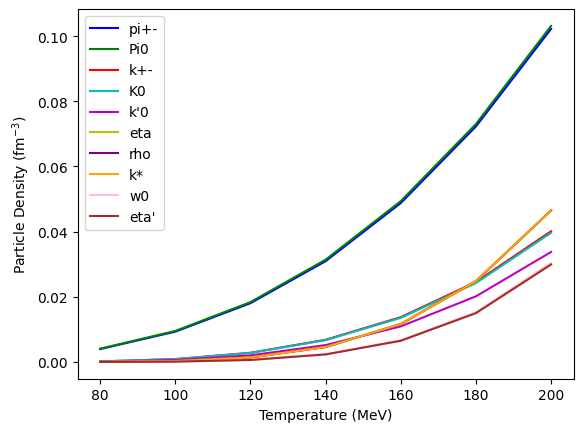

In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

# Define values for g1 and g2
g1 = 1
g2 = 3

# Define mass values for rho, k*, w0, and eta particles in MeV/c^2
mass_values_mev1 = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]

# Define temperature values in MeV
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]

# Define mass values for pi+-, Pi0, k+-, K0, k'0, and eta particles in MeV/c^2
mass_values_mev = [139.6, 135, 493.7, 497.6, 547.862]

# Conversion factor from MeV^3 to fm^(-3)
conversion_factor = (1.25e-7)

# Store results for particle density
results_particle_density = []

# Calculate values for the first set of particles (pseudoscalar mesons)
for mass in mass_values_mev:
    mass_particle_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g1, mass, 0, tmp))[0] * conversion_factor
        mass_particle_density_results.append(result_particle_density)
    results_particle_density.append(mass_particle_density_results)

# Calculate values for the second set of particles (mesons)
for mass in mass_values_mev1:
    mass_particle_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g2, mass, 0, tmp))[0] * conversion_factor
        mass_particle_density_results.append(result_particle_density)
    results_particle_density.append(mass_particle_density_results)

# Plotting the results
labels = ['pi+-', 'Pi0', 'k+-', 'K0', 'k\'0', 'eta', 'rho', 'k*', 'w0', 'eta\'']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'purple', 'orange', 'pink', 'brown']

for i, label in enumerate(labels):
    plt.plot(tmp_values_mev, results_particle_density[i], color=colors[i], label=label)

plt.xlabel('Temperature (MeV)')
plt.ylabel('Particle Density (fm$^{-3}$)')
plt.legend()
plt.show()


<ipython-input-11-54f94c64ceed>:6: RuntimeWarning: overflow encountered in exp
  y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)


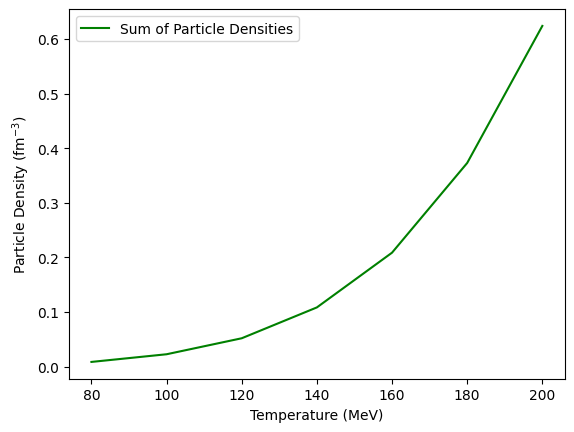

In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

# Define values for g1 and g2
g1 = 1
g2 = 3

# Define mass values for rho, k*, w0, and eta particles in MeV/c^2
mass_values_mev1 = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]

# Define temperature values in MeV
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]

# Define mass values for pi+-, Pi0, k+-, K0, k'0, and eta particles in MeV/c^2
mass_values_mev = [139.6, 135, 493.7, 497.6, 547.862]

# Conversion factor from MeV^3 to fm^(-3)
conversion_factor = (1.25e-7)

# Store results for particle density
results_particle_density = []

# Calculate values for the first set of particles (pseudoscalar mesons)
for mass in mass_values_mev:
    mass_particle_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g1, mass, 0, tmp))[0] * conversion_factor
        mass_particle_density_results.append(result_particle_density)
    results_particle_density.append(mass_particle_density_results)

# Calculate values for the second set of particles (mesons)
for mass in mass_values_mev1:
    mass_particle_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g2, mass, 0, tmp))[0] * conversion_factor
        mass_particle_density_results.append(result_particle_density)
    results_particle_density.append(mass_particle_density_results)

# Calculate the sum of particle densities
sum_particle_density = np.sum(results_particle_density, axis=0)

# Plotting the sum of particle densities
plt.plot(tmp_values_mev, sum_particle_density, color='green', label='Sum of Particle Densities')

plt.xlabel('Temperature (MeV)')
plt.ylabel('Particle Density (fm$^{-3}$)')
plt.legend()
plt.show()


all meson particle density graph

In [ ]:
from scipy.integrate import quad
import numpy as np

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) - 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 - np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = (-(g * tmp) / (2 * np.pi ** 2)) * y
    return partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) - 1))
    y = x ** 2 * (np.log((1 - np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) - z)
    entropy_density = (-(g / (2 * np.pi ** 2))) * y
    return entropy_density
g=[g1,g2]
mass_values_mev = [139.6,135,493.7,497.6,547.862]  #  mass values for pi+-,Pi0,k+-,K0 k'0, eta particles in MeV/c^2
mu = 0
g1 = 1

tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  #  temperature values in MeV

results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

for mass in mass_values_mev:
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g1, mass, mu, tmp))[0] * conversion_factor
        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g1, mass, mu, tmp))[0] * conversion_factor
        result_energy_density = quad(energy_density, 0, np.inf, args=(g1, mass, mu, tmp))[0] * conversion_factor
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g1, mass, mu, tmp))[0] * conversion_factor
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)
    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)


mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]  # mass values for rho, k*, w0 eta particles in MeV/c^2
mu = 0
g2 = 3
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  #  temperature values in MeV

results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

for mass in mass_values_mev:
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g2, mass, mu, tmp))[0] * conversion_factor
        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g2, mass, mu, tmp))[0] * conversion_factor
        result_energy_density = quad(energy_density, 0, np.inf, args=(g2, mass, mu, tmp))[0] * conversion_factor
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g2, mass, mu, tmp))[0] * conversion_factor
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)
    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)

print("Particle density results (fm^(-3)):")
print(results_particle_density)
print("\nPartial pressure results (fm^(-3)):")
print(results_partial_pressure)
print("\nEnergy density results (fm^(-3)):")
print(results_energy_density)
print("\nEntropy density results (fm^(-3)):")
print(results_entropy_density)




import matplotlib.pyplot as plt

# Plot particle density vs. temperature
plt.figure(figsize=(8, 6))

#mass_values_mev = [139.6,135,493.7,497.6,547.862]  # mass values for pi+-,Pi0,k+-,K0 k'0, eta particles in MeV/c^2
particle_names = ['pi+', 'pi-', 'pi0', 'K+', 'K-', 'K0','eta']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV

numberdensitypion=[0.0039472299881886585, 0.009297094489335479, 0.018033980250364155, 0.030935811301194174, 0.04876665357383571, 0.072281907579621, 0.10223125366473636]

numberdensityneutralpion=[0.0040750934157599665, 0.009518069857222923, 0.0183657850057352, 0.03139308009412946, 0.04936179493925689, 0.07302566943468124, 0.10313310592161555]

numberdensitykaon=[0.0001724151141698021, 0.0008836458723164689, 0.0028196629785569595, 0.006810237470296332, 0.013751054384876928, 0.02455318344199813, 0.040120181287363985]

numberdensityneutralkaon=[0.00016581827503588258, 0.0008577630444783472, 0.0027536734462272065, 0.006678918746405322, 0.013527451269732434, 0.02421030989718341, 0.03963193979968982]

numberdenistyneutaleta=[9.976928097951086e-05, 0.000582027319385251, 0.002020983203023639, 0.005177563272534232, 0.010915081667485376, 0.020137588043756947, 0.03375642192309524]

numberdensitypseudoscalarmeson = []
for i in range(7):
    numberdensitypseudoscalarmeson.append(numberdensitypion[i] + numberdensityneutralpion[i] + numberdensitykaon[i] + numberdensityneutralkaon[i] + numberdenistyneutaleta[i])


mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]  # mass values for rho, k*, w0 eta particles in MeV/c^2
particle_names = ['rho+', 'rho-', 'rho0', 'K*+', 'K*0', 'K*-','Kbar*0', 'w0']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
particledensityrhoplus = [2.734068778216081e-05, 0.0002771372326043581, 0.001383750174468794, 0.004575731737671318, 0.01164118504765826, 0.024789448124486982, 0.0465030354779013]
particledensityrhominus = [2.734068778216081e-05, 0.0002771372326043581, 0.001383750174468794, 0.004575731737671318, 0.01164118504765826, 0.024789448124486982, 0.0465030354779013]
particledensityrhonot = [2.734068778216081e-05, 0.0002771372326043581, 0.001383750174468794, 0.004575731737671318, 0.01164118504765826, 0.024789448124486982, 0.0465030354779013]
particledensitykstarplus = [7.683896787560611e-06, 0.00010368418337358757, 0.0006254676892257744, 0.0023641198938024375, 0.006640970586599348, 0.015258735857391053, 0.030392569249726192]
particledensitykstarzero = [7.325880313684304e-06, 9.991482284218788e-05, 0.0006070052624237216, 0.0023058478413108133, 0.006501385722063629, 0.014980727344384943, 0.02990618308249728]
particledensitykstarminus = [7.325880313684304e-06, 9.991482284218788e-05, 0.0006070052624237216, 0.0023058478413108133, 0.006501385722063629, 0.014980727344384943, 0.02990618308249728]
particledensitykstarbar = [7.325880313684304e-06, 9.991482284218788e-05, 0.0006070052624237216, 0.0023058478413108133, 0.006501385722063629, 0.014980727344384943, 0.02990618308249728]
particledensitywnot = [2.524375841685121e-05, 0.00026055667468660883, 0.0013166069375934535, 0.004390596104440139, 0.011240129027882389, 0.024050173122209185, 0.04528643654883241]
numberdensitymeson = []
for i in range(7):
    numberdensitymeson.append(particledensityrhoplus[i] + particledensityrhominus[i] + particledensityrhonot[i] + particledensitykstarplus[i] + particledensitykstarzero[i] + particledensitykstarminus[i] + particledensitykstarbar[i] + particledensitywnot[i])

print("Number density of mesons:")
print(numberdensitymeson)


numberdensity=[]
for i in range(7):
  numberdensity.append(numberdensitypseudoscalarmeson[i]+numberdensitymeson[i])





plt.plot(tmp_values_mev, numberdensitypion, label=r'$\pi^+$')
plt.plot(tmp_values_mev, numberdensitypion, label=r'$\pi^-$')
plt.plot(tmp_values_mev, numberdensitypion, label=r'$\pi^0$')
plt.plot(tmp_values_mev, numberdensitykaon, label=r'$K^+$')
plt.plot(tmp_values_mev, numberdensitykaon, label=r'$K^-$')
plt.plot(tmp_values_mev, numberdensitykaon, label=r'$K^0$')
plt.plot(tmp_values_mev, numberdensitypion, label=r'$\eta^0$')
plt.plot(tmp_values_mev, particledensityrhoplus, label=r'$\rho^+$')
plt.plot(tmp_values_mev, particledensityrhominus, label=r'$\rho^-$')
plt.plot(tmp_values_mev, particledensityrhonot, label=r'$\rho^0$')
plt.plot(tmp_values_mev, particledensitykstarplus, label=r'$K^*+$')
plt.plot(tmp_values_mev, particledensitykstarzero, label=r'$K^*0$')
plt.plot(tmp_values_mev, particledensitykstarminus, label=r'$K^-$')
plt.plot(tmp_values_mev, particledensitykstarbar, label=r'$\bar{K}^*0$')
plt.plot(tmp_values_mev, particledensitywnot, label=r'$w^0$')
plt.plot(tmp_values_mev, numberdensitypseudoscalarmeson, label='Total')
plt.plot(tmp_values_mev, numberdensitymeson, label='Total')
plt.plot(tmp_values_mev, numberdensity, label='Total')
plt.xlabel('Temperature (MeV)')
plt.ylabel('Particle Density ($\mathrm{fm}^{-3}$)')
plt.title('Particle Density vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
for baryon

<ipython-input-1-76681089e013>:5: RuntimeWarning: overflow encountered in exp
  y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
<ipython-input-1-76681089e013>:15: RuntimeWarning: overflow encountered in exp
  y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
<ipython-input-1-76681089e013>:20: RuntimeWarning: overflow encountered in exp
  z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))


Particle density results (fm^(-3)):
[[3.076765473711838e-06, 4.6522529337879755e-05, 0.00030255984906000355, 0.001205712671821495, 0.0035204725595332632, 0.008326373930935172, 0.016952084859539536], [3.022804617676361e-06, 4.5887240671610966e-05, 0.00029920936761543054, 0.0011945756234328128, 0.0034927822499357347, 0.008269720248749307, 0.016851058916912607], [4.228646344628001e-07, 9.91739269319515e-06, 8.629260503017691e-05, 0.00042287561292013686, 0.001440604367308059, 0.0038388193258380465, 0.008593483225638448], [1.83886161786528e-07, 5.175584448500262e-06, 5.0829722758234376e-05, 0.00027147984883216605, 0.0009862027077298411, 0.0027618968355218898, 0.006432253573288366], [1.7718848966702723e-07, 5.027662690583252e-06, 4.9643428025329046e-05, 0.0002661604781424032, 0.0009696448092820397, 0.002721536113338773, 0.006349422251774407], [1.6778383660251937e-07, 4.8178565731609015e-06, 4.794952080174241e-05, 0.0002585285159994811, 0.0009458029124563408, 0.002663257554438407, 0.006229550

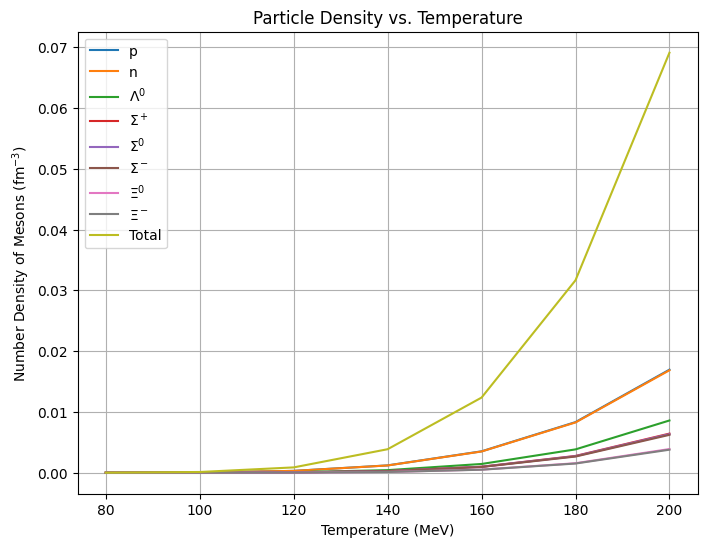

In [ ]:
from scipy.integrate import quad
import numpy as np

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = ((g * tmp) / (2 * np.pi ** 2)) * y
    return partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))
    y = x ** 2 * (np.log((1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) + z)
    entropy_density = ((g / (2 * np.pi ** 2))) * y
    return entropy_density

mass_values_mev = [938, 939.6, 1115.7, 1189.37, 1192.642, 1197.45, 1314.86, 1321.71]  # mass values for p,n,lambda0,sigma+0-,xi0,xi- particles in MeV/c^2
mu = 0
g = 2
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  #  temperature values in MeV

results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

for mass in mass_values_mev:
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)
    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)

print("Particle density results (fm^(-3)):")
print(results_particle_density)
print("\nPartial pressure results (fm^(-3)):")
print(results_partial_pressure)
print("\nEnergy density results (fm^(-3)):")
print(results_energy_density)
print("\nEntropy density results (fm^(-3)):")
print(results_entropy_density)




import matplotlib.pyplot as plt

# Plot particle density vs. temperature
plt.figure(figsize=(8, 6))

mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]  # mass values for rho, k*, w0 eta particles in MeV/c^2
particle_names = ['rho+', 'rho-', 'rho0', 'K*+', 'K*0', 'K*-','Kbar*0', 'w0']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
particledensityp = [3.076765473711838e-06, 4.6522529337879755e-05, 0.00030255984906000355, 0.001205712671821495, 0.0035204725595332632, 0.008326373930935172, 0.016952084859539536]
particledensityn = [3.022804617676361e-06, 4.5887240671610966e-05, 0.00029920936761543054, 0.0011945756234328128, 0.0034927822499357347, 0.008269720248749307, 0.016851058916912607]
particledensitylambdanot = [4.228646344628001e-07, 9.91739269319515e-06, 8.629260503017691e-05, 0.00042287561292013686, 0.001440604367308059, 0.0038388193258380465, 0.008593483225638448]
particledensitysigmaplus = [1.83886161786528e-07, 5.175584448500262e-06, 5.0829722758234376e-05, 0.00027147984883216605, 0.0009862027077298411, 0.0027618968355218898, 0.006432253573288366]
particledensitysigmazero = [1.7718848966702723e-07, 5.027662690583252e-06, 4.9643428025329046e-05, 0.0002661604781424032, 0.0009696448092820397, 0.002721536113338773, 0.006349422251774407]
particledensitysigmaminus = [1.6778383660251937e-07, 4.8178565731609015e-06, 4.794952080174241e-05, 0.0002585285159994811, 0.0009458029124563408, 0.002663257554438407, 0.006229550253011742]
particledensityxinot= [4.402935153287937e-08, 1.6914975603897513e-06, 2.0425413594833412e-05, 0.0001263637048115081, 0.0005122833965233212, 0.0015618859837090735, 0.003892124987349631]
particledensityximinus= [4.070980888125045e-08, 1.5907776676771354e-06, 1.9427323833346588e-05, 0.00012115846667770921, 0.0004941374184522883, 0.0015135783964346592, 0.003785731342193027]
numberdensitybaryon = []
for i in range(7):
    numberdensitybaryon.append(particledensityp[i] + particledensityn[i] + particledensitylambdanot[i] + particledensitysigmaplus[i] + particledensitysigmazero[i] + particledensitysigmaminus[i] + particledensityxinot[i] + particledensityximinus[i])

print("Number density of baryons:")
print(numberdensitybaryon)

# Plotting the particle densities
plt.plot(tmp_values_mev, particledensityp, label=r'p')
plt.plot(tmp_values_mev, particledensityn, label=r'n')
plt.plot(tmp_values_mev, particledensitylambdanot, label=r'$\Lambda^0$')
plt.plot(tmp_values_mev, particledensitysigmaplus, label=r'$\Sigma^+$')
plt.plot(tmp_values_mev, particledensitysigmazero, label=r'$\Sigma^0$')
plt.plot(tmp_values_mev, particledensitysigmaminus, label=r'$\Sigma^-$')
plt.plot(tmp_values_mev, particledensityxinot, label=r'$\Xi^0$')
plt.plot(tmp_values_mev, particledensityximinus, label=r'$\Xi^-$')
plt.plot(tmp_values_mev, numberdensitybaryon, label='Total')

plt.xlabel('Temperature (MeV)')
plt.ylabel('Number Density of Mesons ($\mathrm{fm}^{-3}$)')
plt.title('Particle Density vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-4-cb2dc83d2a66>:5: RuntimeWarning: overflow encountered in exp
  y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
<ipython-input-4-cb2dc83d2a66>:15: RuntimeWarning: overflow encountered in exp
  y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
<ipython-input-4-cb2dc83d2a66>:20: RuntimeWarning: overflow encountered in exp
  z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))


Particle density results (fm^(-3)):
[[3.076765473711838e-06, 4.6522529337879755e-05, 0.00030255984906000355, 0.001205712671821495, 0.0035204725595332632, 0.008326373930935172, 0.016952084859539536], [3.022804617676361e-06, 4.5887240671610966e-05, 0.00029920936761543054, 0.0011945756234328128, 0.0034927822499357347, 0.008269720248749307, 0.016851058916912607], [4.228646344628001e-07, 9.91739269319515e-06, 8.629260503017691e-05, 0.00042287561292013686, 0.001440604367308059, 0.0038388193258380465, 0.008593483225638448], [1.83886161786528e-07, 5.175584448500262e-06, 5.0829722758234376e-05, 0.00027147984883216605, 0.0009862027077298411, 0.0027618968355218898, 0.006432253573288366], [1.7718848966702723e-07, 5.027662690583252e-06, 4.9643428025329046e-05, 0.0002661604781424032, 0.0009696448092820397, 0.002721536113338773, 0.006349422251774407], [1.6778383660251937e-07, 4.8178565731609015e-06, 4.794952080174241e-05, 0.0002585285159994811, 0.0009458029124563408, 0.002663257554438407, 0.006229550

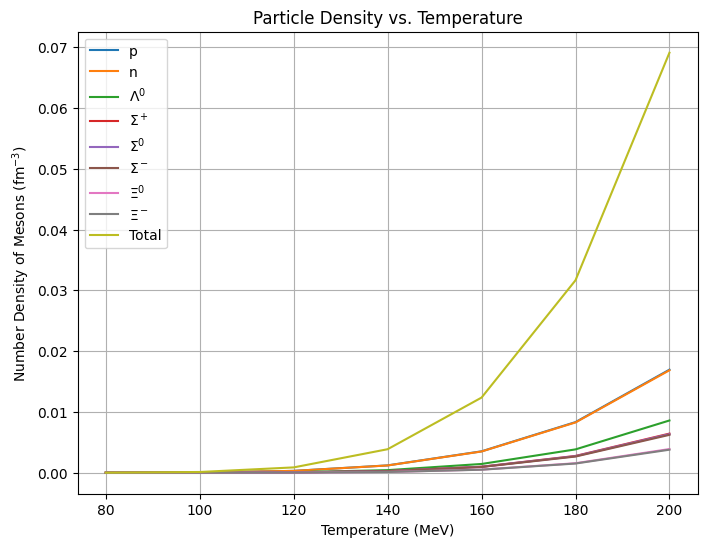

In [ ]:
from scipy.integrate import quad
import numpy as np

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = ((g * tmp) / (2 * np.pi ** 2)) * y
    return partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))
    y = x ** 2 * (np.log((1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) + z)
    entropy_density = ((g / (2 * np.pi ** 2))) * y
    return entropy_density

mass_values_mev = [938, 939.6, 1115.7, 1189.37, 1192.642, 1197.45, 1314.86, 1321.71]  # mass values for p,n,lambda0,sigma+0-,xi0,xi- particles in MeV/c^2
mu = 0
g = 2
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  #  temperature values in MeV

results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

for mass in mass_values_mev:
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)
    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)

print("Particle density results (fm^(-3)):")
print(results_particle_density)
print("\nPartial pressure results (fm^(-3)):")
print(results_partial_pressure)
print("\nEnergy density results (fm^(-3)):")
print(results_energy_density)
print("\nEntropy density results (fm^(-3)):")
print(results_entropy_density)




import matplotlib.pyplot as plt

# Plot particle density vs. temperature
plt.figure(figsize=(8, 6))

mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]  # mass values for rho, k*, w0 eta particles in MeV/c^2
particle_names = ['p', 'n', 'lambda0', 'sigma+', 'sigma0', 'sigma-','xi0', 'xi-']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
particledensityp = [3.076765473711838e-06, 4.6522529337879755e-05, 0.00030255984906000355, 0.001205712671821495, 0.0035204725595332632, 0.008326373930935172, 0.016952084859539536]
particledensityn = [3.022804617676361e-06, 4.5887240671610966e-05, 0.00029920936761543054, 0.0011945756234328128, 0.0034927822499357347, 0.008269720248749307, 0.016851058916912607]
particledensitylambdanot = [4.228646344628001e-07, 9.91739269319515e-06, 8.629260503017691e-05, 0.00042287561292013686, 0.001440604367308059, 0.0038388193258380465, 0.008593483225638448]
particledensitysigmaplus = [1.83886161786528e-07, 5.175584448500262e-06, 5.0829722758234376e-05, 0.00027147984883216605, 0.0009862027077298411, 0.0027618968355218898, 0.006432253573288366]
particledensitysigmazero = [1.7718848966702723e-07, 5.027662690583252e-06, 4.9643428025329046e-05, 0.0002661604781424032, 0.0009696448092820397, 0.002721536113338773, 0.006349422251774407]
particledensitysigmaminus = [1.6778383660251937e-07, 4.8178565731609015e-06, 4.794952080174241e-05, 0.0002585285159994811, 0.0009458029124563408, 0.002663257554438407, 0.006229550253011742]
particledensityxinot= [4.402935153287937e-08, 1.6914975603897513e-06, 2.0425413594833412e-05, 0.0001263637048115081, 0.0005122833965233212, 0.0015618859837090735, 0.003892124987349631]
particledensityximinus= [4.070980888125045e-08, 1.5907776676771354e-06, 1.9427323833346588e-05, 0.00012115846667770921, 0.0004941374184522883, 0.0015135783964346592, 0.003785731342193027]
numberdensitybaryon = []
for i in range(7):
    numberdensitybaryon.append(particledensityp[i] + particledensityn[i] + particledensitylambdanot[i] + particledensitysigmaplus[i] + particledensitysigmazero[i] + particledensitysigmaminus[i] + particledensityxinot[i] + particledensityximinus[i])

print("Number density of baryons:")
print(numberdensitybaryon)

# Plotting the particle densities
plt.plot(tmp_values_mev, particledensityp, label=r'p')
plt.plot(tmp_values_mev, particledensityn, label=r'n')
plt.plot(tmp_values_mev, particledensitylambdanot, label=r'$\Lambda^0$')
plt.plot(tmp_values_mev, particledensitysigmaplus, label=r'$\Sigma^+$')
plt.plot(tmp_values_mev, particledensitysigmazero, label=r'$\Sigma^0$')
plt.plot(tmp_values_mev, particledensitysigmaminus, label=r'$\Sigma^-$')
plt.plot(tmp_values_mev, particledensityxinot, label=r'$\Xi^0$')
plt.plot(tmp_values_mev, particledensityximinus, label=r'$\Xi^-$')
plt.plot(tmp_values_mev, numberdensitybaryon, label='Total')

plt.xlabel('Temperature (MeV)')
plt.ylabel('Number Density of Mesons ($\mathrm{fm}^{-3}$)')
plt.title('Particle Density vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()

for baryon


<ipython-input-9-b1aee63e6ee2>:5: RuntimeWarning: overflow encountered in exp
  y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
<ipython-input-9-b1aee63e6ee2>:15: RuntimeWarning: overflow encountered in exp
  y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
<ipython-input-9-b1aee63e6ee2>:20: RuntimeWarning: overflow encountered in exp
  z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))


Particle density results (fm^(-3)):
[[3.076765473711838e-06, 4.6522529337879755e-05, 0.00030255984906000355, 0.001205712671821495, 0.0035204725595332632, 0.008326373930935172, 0.016952084859539536], [3.022804617676361e-06, 4.5887240671610966e-05, 0.00029920936761543054, 0.0011945756234328128, 0.0034927822499357347, 0.008269720248749307, 0.016851058916912607], [4.228646344628001e-07, 9.91739269319515e-06, 8.629260503017691e-05, 0.00042287561292013686, 0.001440604367308059, 0.0038388193258380465, 0.008593483225638448], [1.83886161786528e-07, 5.175584448500262e-06, 5.0829722758234376e-05, 0.00027147984883216605, 0.0009862027077298411, 0.0027618968355218898, 0.006432253573288366], [1.7718848966702723e-07, 5.027662690583252e-06, 4.9643428025329046e-05, 0.0002661604781424032, 0.0009696448092820397, 0.002721536113338773, 0.006349422251774407], [1.6778383660251937e-07, 4.8178565731609015e-06, 4.794952080174241e-05, 0.0002585285159994811, 0.0009458029124563408, 0.002663257554438407, 0.006229550

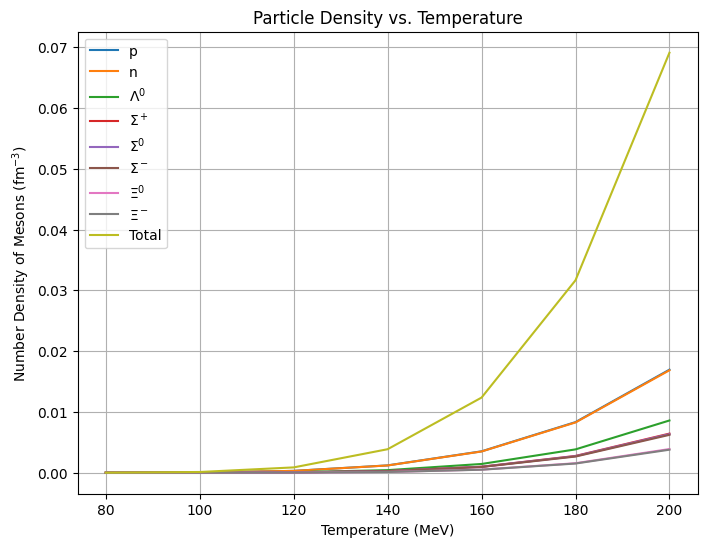

Partial pressure of baryons:
[4.181273725553041e-11, 3.6189548767263096e-10, 1.5214894978847872e-09, 4.228168408492574e-09, 9.056757014881239e-09, 1.6293143887364744e-08, 2.592964177021782e-08]


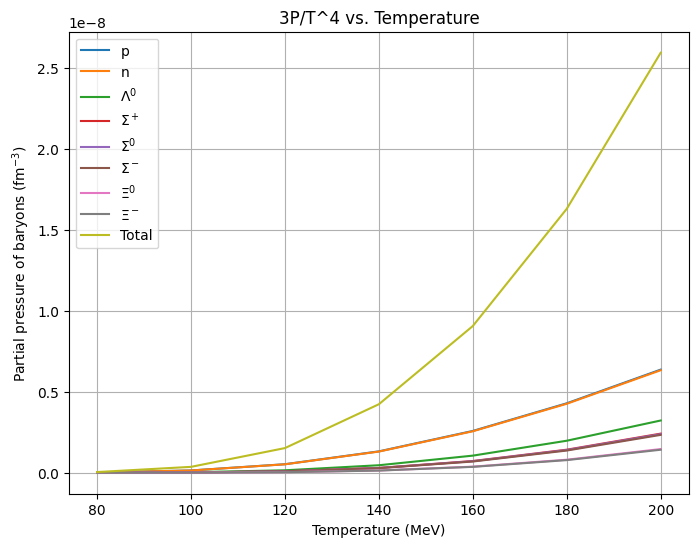

energy density of baryons:
[1.9234852613022692e-10, 1.4023602368541709e-09, 5.157754058876399e-09, 1.2846624204179964e-08, 2.5086272491183078e-08, 4.1670133493419953e-08, 6.184585237295341e-08]


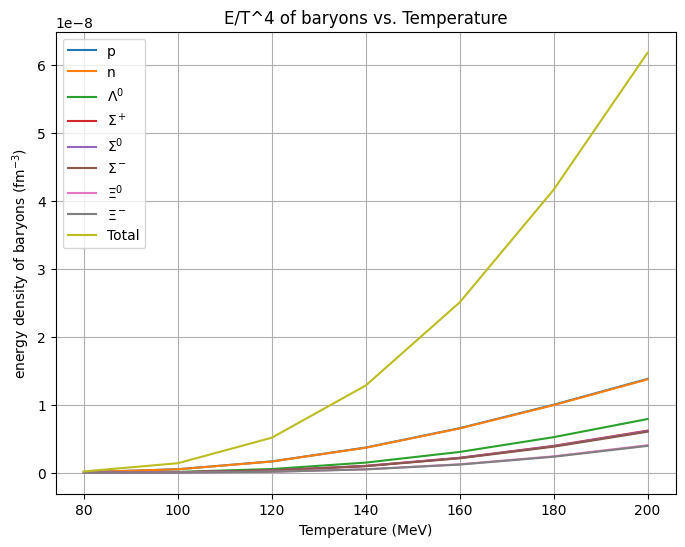

entropy density of baryons:
[2.062861052192037e-10, 1.5229918750737127e-09, 5.6649172248379945e-09, 1.4256013673686481e-08, 2.8105191496143488e-08, 4.7101181455894885e-08, 7.048906629635935e-08]


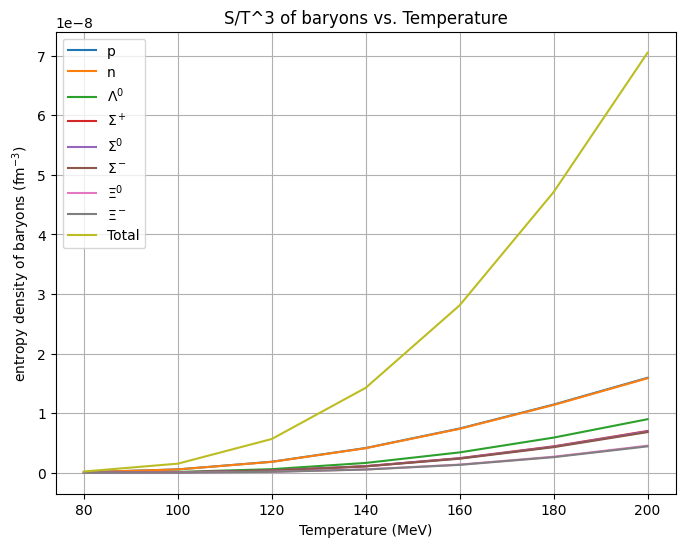

In [ ]:
from scipy.integrate import quad
import numpy as np

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = ((g * tmp) / (2 * np.pi ** 2)) * y
    return 3 * partial_pressure / (tmp ** 4)

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density/(tmp**4)

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))
    y = x ** 2 * (np.log((1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) + z)
    entropy_density = ((g / (2 * np.pi ** 2))) * y
    return entropy_density/(tmp**3)

mass_values_mev = [938, 939.6, 1115.7, 1189.37, 1192.642, 1197.45, 1314.86, 1321.71]  # mass values for p,n,lambda0,sigma+0-,xi0,xi- particles in MeV/c^2
mu = 0
g = 2
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  #  temperature values in MeV

results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

for mass in mass_values_mev:
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu, tmp))[0] * conversion_factor
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)
    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)

print("Particle density results (fm^(-3)):")
print(results_particle_density)
print("\nPartial pressure results (fm^(-3)):")
print(results_partial_pressure)
print("\nEnergy density results (fm^(-3)):")
print(results_energy_density)
print("\nEntropy density results (fm^(-3)):")
print(results_entropy_density)




import matplotlib.pyplot as plt

# Plot particle density vs. temperature
plt.figure(figsize=(8, 6))

mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]  # mass values for rho, k*, w0 eta particles in MeV/c^2
particle_names = ['p', 'n', 'lambda0', 'sigma+', 'sigma0', 'sigma-','xi0', 'xi-']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
particledensityp = [3.076765473711838e-06, 4.6522529337879755e-05, 0.00030255984906000355, 0.001205712671821495, 0.0035204725595332632, 0.008326373930935172, 0.016952084859539536]
particledensityn = [3.022804617676361e-06, 4.5887240671610966e-05, 0.00029920936761543054, 0.0011945756234328128, 0.0034927822499357347, 0.008269720248749307, 0.016851058916912607]
particledensitylambdanot = [4.228646344628001e-07, 9.91739269319515e-06, 8.629260503017691e-05, 0.00042287561292013686, 0.001440604367308059, 0.0038388193258380465, 0.008593483225638448]
particledensitysigmaplus = [1.83886161786528e-07, 5.175584448500262e-06, 5.0829722758234376e-05, 0.00027147984883216605, 0.0009862027077298411, 0.0027618968355218898, 0.006432253573288366]
particledensitysigmazero = [1.7718848966702723e-07, 5.027662690583252e-06, 4.9643428025329046e-05, 0.0002661604781424032, 0.0009696448092820397, 0.002721536113338773, 0.006349422251774407]
particledensitysigmaminus = [1.6778383660251937e-07, 4.8178565731609015e-06, 4.794952080174241e-05, 0.0002585285159994811, 0.0009458029124563408, 0.002663257554438407, 0.006229550253011742]
particledensityxinot= [4.402935153287937e-08, 1.6914975603897513e-06, 2.0425413594833412e-05, 0.0001263637048115081, 0.0005122833965233212, 0.0015618859837090735, 0.003892124987349631]
particledensityximinus= [4.070980888125045e-08, 1.5907776676771354e-06, 1.9427323833346588e-05, 0.00012115846667770921, 0.0004941374184522883, 0.0015135783964346592, 0.003785731342193027]
numberdensitybaryon = []
for i in range(7):
    numberdensitybaryon.append(particledensityp[i] + particledensityn[i] + particledensitylambdanot[i] + particledensitysigmaplus[i] + particledensitysigmazero[i] + particledensitysigmaminus[i] + particledensityxinot[i] + particledensityximinus[i])

print("Number density of baryons:")
print(numberdensitybaryon)

# Plotting the particle densities
plt.plot(tmp_values_mev, particledensityp, label=r'p')
plt.plot(tmp_values_mev, particledensityn, label=r'n')
plt.plot(tmp_values_mev, particledensitylambdanot, label=r'$\Lambda^0$')
plt.plot(tmp_values_mev, particledensitysigmaplus, label=r'$\Sigma^+$')
plt.plot(tmp_values_mev, particledensitysigmazero, label=r'$\Sigma^0$')
plt.plot(tmp_values_mev, particledensitysigmaminus, label=r'$\Sigma^-$')
plt.plot(tmp_values_mev, particledensityxinot, label=r'$\Xi^0$')
plt.plot(tmp_values_mev, particledensityximinus, label=r'$\Xi^-$')
plt.plot(tmp_values_mev, numberdensitybaryon, label='Total')

plt.xlabel('Temperature (MeV)')
plt.ylabel('Number Density of Mesons ($\mathrm{fm}^{-3}$)')
plt.title('Particle Density vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()



import matplotlib.pyplot as plt

# Plot 3p/T^4 vs. temperature
plt.figure(figsize=(8, 6))

mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]  # mass values for baryon particles in MeV/c^2
particle_names = ['p', 'n', 'lambda0', 'sigma+', 'sigma0', 'sigma-', 'xi0', 'xi-']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
ppp = [1.802794658884097e-11, 1.3956948647471853e-10, 5.253110601314343e-10, 1.3184519031939178e-09, 2.5795956524583637e-09, 4.286639505083208e-09, 6.365700669434558e-09]
ppn = [1.7711768830878432e-11, 1.3766356506878777e-10, 5.194934468341057e-10, 1.306270694788221e-09, 2.5592949629384614e-09, 4.257442556411402e-09, 6.32769797928179e-09]
pplambdanot = [2.47772280946071e-12, 2.975224744968785e-11, 1.4981576182677422e-10, 4.623529592613315e-10, 1.0552849086753658e-09, 1.975321220913261e-09, 3.224410901795854e-09]
ppsigmaplus = [1.0774580693592616e-12, 1.552677075580541e-11, 8.824675526065353e-11, 2.968171063030614e-10, 7.223837496891563e-10, 1.4210273185880817e-09, 2.4130637644606485e-09]
ppsigmazero = [1.038213892213549e-12, 1.508300445688313e-11, 8.618718079029723e-11, 2.910010608105074e-10, 7.102539314740288e-10, 1.4002560622790545e-09, 2.381974360795447e-09]
ppsigmaminus = [9.83108516270183e-13, 1.4453584672729867e-11, 8.324632128814675e-11, 2.8265651142849087e-10, 6.927881626884523e-10, 1.3702638690250744e-09, 2.3369831299247377e-09]
ppxinot = [2.579844850722683e-13, 5.074494335682496e-12, 3.546088833584422e-11, 1.3815459575687492e-10, 3.7522368675503164e-10, 8.035242992394671e-10, 1.459863719260674e-09]
ppximinus = [2.3853406343503546e-13, 4.7723344583359e-12, 3.37280834175315e-11, 1.3246357695016887e-10, 3.619319602023789e-10, 7.786690558251933e-10, 1.419947245264111e-09]

ppbaryon = []
for i in range(7):
    ppbaryon.append(ppp[i] + ppn[i] + pplambdanot[i] + ppsigmaplus[i] + ppsigmazero[i] + ppsigmaminus[i] + ppxinot[i] + ppximinus[i])

print("Partial pressure of baryons:")
print(ppbaryon)

# Plotting the energy densities
plt.plot(tmp_values_mev, ppp, label='p')
plt.plot(tmp_values_mev, ppn, label='n')
plt.plot(tmp_values_mev, pplambdanot, label='$\Lambda^0$')
plt.plot(tmp_values_mev, ppsigmaplus, label='$\Sigma^+$')
plt.plot(tmp_values_mev, ppsigmazero, label='$\Sigma^0$')
plt.plot(tmp_values_mev, ppsigmaminus, label='$\Sigma^-$')
plt.plot(tmp_values_mev, ppxinot, label='$\Xi^0$')
plt.plot(tmp_values_mev, ppximinus, label='$\Xi^-$')
plt.plot(tmp_values_mev, ppbaryon, label='Total')

plt.xlabel('Temperature (MeV)')
plt.ylabel('Partial pressure of baryons ($\mathrm{fm}^{-3}$)')
plt.title('3P/T^4 vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()



import matplotlib.pyplot as plt

# Plot E/T^4 vs. temperature
plt.figure(figsize=(8, 6))

mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]  # mass values for baryons in MeV/c^2
particle_names = ['p', 'n', 'lambda0', 'sigma+', 'sigma0', 'sigma-', 'xi0', 'xi-']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
edp = [8.035634539439351e-11, 5.145387369687884e-10, 1.6683465854034893e-09, 3.709531224363413e-09, 6.56163722614773e-09, 1.0010541272439942e-08, 1.3812617603951007e-08]
edn = [7.906376453074519e-11, 5.082340089857886e-10, 1.6521253381407344e-09, 3.6800860551159022e-09, 6.518215720312077e-09, 9.954417894888807e-09, 1.3746164346425486e-08]
edlambdanot = [1.2860593228665647e-11, 1.2704987479227326e-10, 5.48263867839866e-10, 1.4913775647129171e-09, 3.0623822219089896e-09, 5.237874293687234e-09, 7.908279669143328e-09]
edsigmaplus = [5.920667779093608e-12, 7.007102949057681e-11, 3.407088807513786e-10, 1.0083688845985523e-09, 2.204229383260617e-09, 3.955696481225906e-09, 6.203407136004232e-09]
edsigmazero = [5.719069408999957e-12, 6.82310187111304e-11, 3.335283549025052e-10, 9.90831329847277e-10, 2.1719363778297724e-09, 3.9061008496674455e-09, 6.136005640612681e-09]
edsigmaminus = [5.435067985777963e-12, 6.561278529112586e-11, 3.2324246218955076e-10, 9.655895376471457e-10, 2.125291340564649e-09, 3.834265100840111e-09, 6.0381635580587e-09]
edxinot = [1.5516168196783355e-12, 2.5001774944844406e-11, 1.490953345323286e-10, 5.098592929315447e-10, 1.2407384061513112e-09, 2.4182093368688985e-09, 4.048093750819609e-09]
edximinus =  [1.4414009828727614e-12, 2.3621007669642884e-11, 1.4244323511654653e-10, 4.909803149632105e-10, 1.2018418150079293e-09, 2.353028263801611e-09, 3.9531206679383756e-09]
edbaryon = []
for i in range(7):
    edbaryon.append(edp[i] + edn[i] + edlambdanot[i] + edsigmaplus[i] + edsigmazero[i] + edsigmaminus[i] + edxinot[i] + edximinus[i])

print("energy density of baryons:")
print(edbaryon)

# Plotting the Energy densities
plt.plot(tmp_values_mev, edp, label='p')
plt.plot(tmp_values_mev, edn, label='n')
plt.plot(tmp_values_mev, edlambdanot, label='$\Lambda^0$')
plt.plot(tmp_values_mev, edsigmaplus, label='$\Sigma^+$')
plt.plot(tmp_values_mev, edsigmazero, label='$\Sigma^0$')
plt.plot(tmp_values_mev, edsigmaminus, label='$\Sigma^-$')
plt.plot(tmp_values_mev, edxinot, label='$\Xi^0$')
plt.plot(tmp_values_mev, edximinus, label='$\Xi^-$')
plt.plot(tmp_values_mev, edbaryon, label='Total')

plt.xlabel('Temperature (MeV)')
plt.ylabel('energy density of baryons ($\mathrm{fm}^{-3}$)')
plt.title('E/T^4 of baryons vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()



# Plot S/T^3 vs. temperature
plt.figure(figsize=(8, 6))

mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]  # mass values for baryons in MeV/c^2
particle_names = ['p', 'n', 'lambda0', 'sigma+', 'sigma0', 'sigma-', 'xi0', 'xi-']
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Example temperature values in MeV
etdp = [8.636566093473229e-11, 5.61061899127028e-10, 1.8434502721139674e-09, 4.149015192094719e-09, 7.421502443633852e-09, 1.143942110746768e-08, 1.5934517827095858e-08]
etdn = [8.496768746744616e-11, 5.54121864008718e-10, 1.8252898204187693e-09, 4.115509620045309e-09, 7.371314041291564e-09, 1.1373565413692605e-08, 1.5855397006186083e-08]
etdlambdanot = [1.3686500831819218e-11, 1.369672906088359e-10, 5.982024551154575e-10, 1.645495217800027e-09, 3.414143858134112e-09, 5.8963147006583205e-09, 8.98308330307528e-09]
etdsigmaplus = [6.279820468880029e-12, 7.524642873784337e-11, 3.701244658382632e-10, 1.1073079200329063e-09, 2.4450239664903355e-09, 4.4293722540886e-09, 7.00776172415778e-09]
etdsigmazero = [6.065140706404473e-12, 7.325868686342478e-11, 3.622574151659376e-10, 1.0878316834507795e-09, 2.4086876883211155e-09, 4.37285287042713e-09, 6.929997094211163e-09]
etdsigmaminus = [5.762770824534691e-12, 7.043064684870249e-11, 3.5099123595226636e-10, 1.0598083747899761e-09, 2.3562207281274667e-09, 4.291019723848469e-09, 6.8171579347002794e-09]
etdxinot = [1.6376116480357583e-12, 2.6693273056738576e-11, 1.6091563064427668e-10, 5.559108248530337e-10, 1.3658129684029883e-09, 2.6860507699458418e-09, 4.534714990573167e-09]
etdximinus =  [1.5209123373511064e-12, 2.5211785822421515e-11, 1.53685929589057e-10, 5.35134840619731e-10, 1.3224858017420554e-09, 2.612584615766243e-09, 4.426436416359746e-09]
etdbaryon = []
for i in range(7):
    etdbaryon.append(etdp[i] + etdn[i] + etdlambdanot[i] + etdsigmaplus[i] + etdsigmazero[i] + etdsigmaminus[i] + etdxinot[i] + etdximinus[i])

print("entropy density of baryons:")
print(etdbaryon)

# Plotting the Energy densities
plt.plot(tmp_values_mev, etdp, label='p')
plt.plot(tmp_values_mev, etdn, label='n')
plt.plot(tmp_values_mev, etdlambdanot, label='$\Lambda^0$')
plt.plot(tmp_values_mev, etdsigmaplus, label='$\Sigma^+$')
plt.plot(tmp_values_mev, etdsigmazero, label='$\Sigma^0$')
plt.plot(tmp_values_mev, etdsigmaminus, label='$\Sigma^-$')
plt.plot(tmp_values_mev, etdxinot, label='$\Xi^0$')
plt.plot(tmp_values_mev, etdximinus, label='$\Xi^-$')
plt.plot(tmp_values_mev, etdbaryon, label='Total')


plt.xlabel('Temperature (MeV)')
plt.ylabel('entropy density of baryons ($\mathrm{fm}^{-3}$)')
plt.title('S/T^3 of baryons vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()







for baryon resonance

<ipython-input-27-fd8a8ff05d2e>:7: RuntimeWarning: overflow encountered in exp
  y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
<ipython-input-27-fd8a8ff05d2e>:17: RuntimeWarning: overflow encountered in exp
  y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
<ipython-input-27-fd8a8ff05d2e>:22: RuntimeWarning: overflow encountered in exp
  z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))


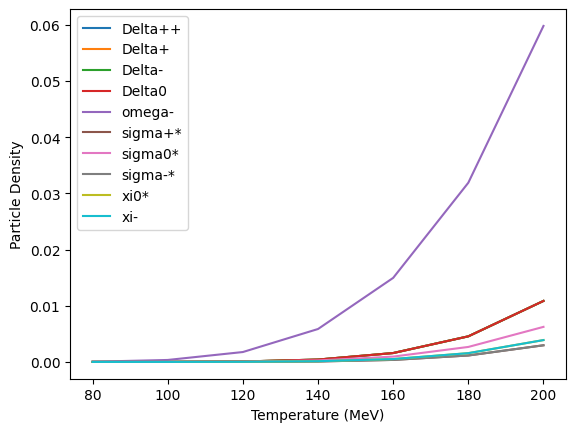

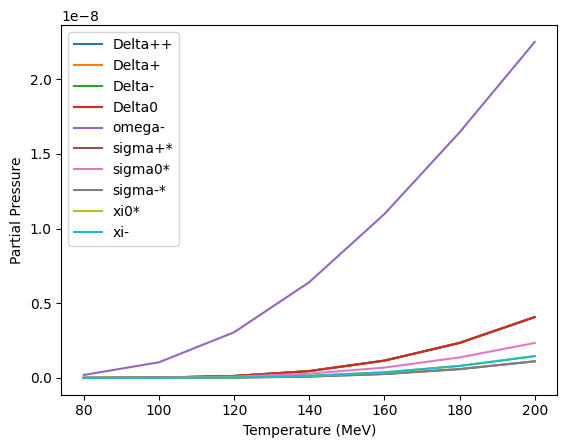

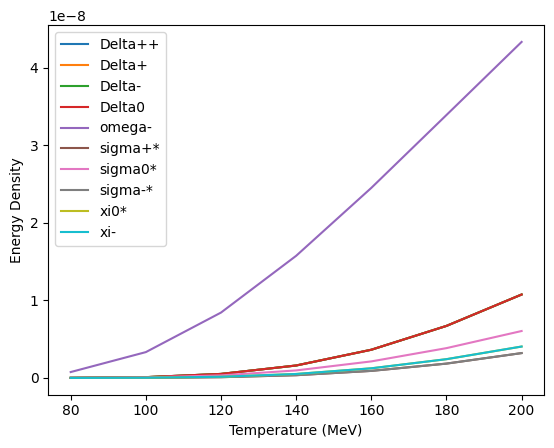

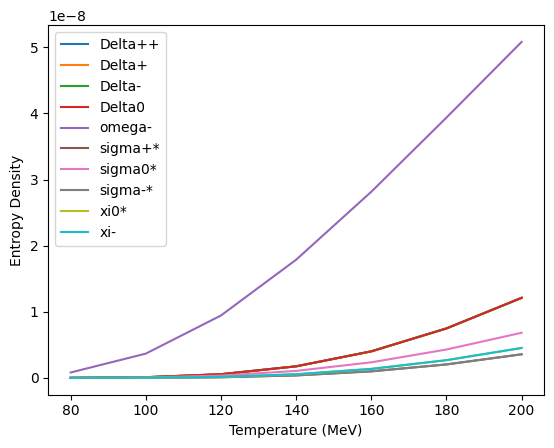

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = ((g * tmp) / (2 * np.pi ** 2)) * y
    return 3 * partial_pressure / (tmp ** 4)

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density/(tmp**4)

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))
    y = x ** 2 * (np.log((1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) + z)
    entropy_density = ((g / (2 * np.pi ** 2))) * y
    return entropy_density/(tmp**3)

# Constants and parameters
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Temperature values in MeV

# Particle properties
particle_names = ['Delta++', 'Delta+', 'Delta-', 'Delta0', 'omega-', 'sigma+*', 'sigma0*', 'sigma-*', 'xi0*', 'xi-']
g_values = [4, 4, 4, 4, 4, 2, 2, 2, 2, 2]
mass_values_mev = [1232, 1232, 1232, 1232, 782, 1382, 1197, 1382, 1315, 1315]
mu_value_mev = 0  # Chemical potential

# Results storage
results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

# Calculate properties for each particle
for g, mass in zip(g_values, mass_values_mev):
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * conversion_factor

        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * conversion_factor
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * conversion_factor

        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * conversion_factor

        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)

    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)

# Plotting particle density
plt.figure()
for i, name in enumerate(particle_names):
    plt.plot(tmp_values_mev, results_particle_density[i], label=name)
plt.xlabel("Temperature (MeV)")
plt.ylabel("Particle Density")
plt.legend()
plt.show()

# Plotting partial pressure
plt.figure()
for i, name in enumerate(particle_names):
    plt.plot(tmp_values_mev, results_partial_pressure[i], label=name)
plt.xlabel("Temperature (MeV)")
plt.ylabel("Partial Pressure")
plt.legend()
plt.show()

# Plotting energy density
plt.figure()
for i, name in enumerate(particle_names):
    plt.plot(tmp_values_mev, results_energy_density[i], label=name)
plt.xlabel("Temperature (MeV)")
plt.ylabel("Energy Density")
plt.legend()
plt.show()

# Plotting entropy density
plt.figure()
for i, name in enumerate(particle_names):
    plt.plot(tmp_values_mev, results_entropy_density[i], label=name)
plt.xlabel("Temperature (MeV)")
plt.ylabel("Entropy Density")
plt.legend()
plt.show()
